# 0. Imports

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

from pickle import dump


pd.set_option('display.max_columns', None)

---

# 1. Data collection

In [560]:
'''url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"

data = pd.read_csv(url)
data.to_csv("C:/Users/manue/Desktop/Proyecto Final/regularized_linear_regression/data/raw/demographic_health_data.csv")'''

'url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"\n\ndata = pd.read_csv(url)\ndata.to_csv("C:/Users/manue/Desktop/Proyecto Final/regularized_linear_regression/data/raw/demographic_health_data.csv")'

In [561]:
df = pd.read_csv("C:/Users/manue/Desktop/Proyecto Final/regularized_linear_regression/data/raw/demographic_health_data.csv", index_col=0)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

---

# 2. Exploration and Data cleaning

## 2.1 County Data Dictionary

Only the features that are not immediately clear upon reading are explained, as the others are straightforward.

**Basic County Information**
- **fips**: FIPS Code for the County
- **TOT_POP**: Total Population
- **N_POP_CHG_2018**: Numeric Change in resident total population 7/1/2017 to 7/1/2018
- **GQ_ESTIMATES_2018**: 7/1/2018 Group Quarters total population estimate

**Population Rates**
- **R_birth_2018**: Birth rate in period 7/1/2017 to 6/30/2018
- **R_death_2018**: Death rate in period 7/1/2017 to 6/30/2018
- **R_NATURAL_INC_2018**: Natural increase rate in period 7/1/2016 to 6/30/2017
- **R_INTERNATIONAL_MIG_2018**: Net international migration rate in period 7/1/2017 to 6/30/2018
- **R_DOMESTIC_MIG_2018**: Net domestic migration rate in period 7/1/2017 to 6/30/2018
- **R_NET_MIG_2018**: Net migration rate in period 7/1/2017 to 6/30/2018

**Education and Poverty**
- **Less than a high school diploma 2014-18**: Education variables are self explanatory, first 4 are number and second 4 are %
- **POVALL_2018**: Estimate of people of all ages in poverty 2018
- **PCTPOVALL_2018**: Estimated percent of people of all ages in poverty 2018
- **PCTPOV017_2018**: Estimated percent of people age 0-17 in poverty 2018
- **PCTPOV517_2018**: Estimate of related children age 5-17 in families in poverty 2018

**Income and Employment**
- **MEDHHINC_2018**: Estimate of median household income 2018
- **CI90LBINC_2018**: 90% confidence interval lower bound of estimate of median household income 2018
- **CI90UBINC_2018**: 90% confidence interval upper bound of estimate of median household income 2018
- **Civilian_labor_force_2018**: Civilian labor force annual average
- **Employed_2018**: Number employed annual average
- **Unemployed_2018**: Number unemployed annual average
- **Unemployment_rate_2018**: Unemployment rate
- **Med_HH_Income_Percent_of_State_Total_2018**: County Household Median Income as a percent of the State Total Median Household Income, 2018

**Healthcare Providers and Facilities**
- **Active Physicians per 100000 Population 2018 (AAMC)**: Total Active Patient Care Physicians per 100,000 Population, 2018 (Assumed identical to state)
- **Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)**: Active Primary Care Physicians per 100,000 Population, 2018 (Assumed identical to state)
- **Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)**: Active Patient Care Primary Care Physicians per 100,000 Population, 2018 (Assumed identical to state)
- **Active General Surgeons per 100000 Population 2018 (AAMC)**: Active General Surgeons per 100,000 Population, 2018 (Assumed identical to state)
- **Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)**: Active Patient Care General Surgeons per 100,000 Population, 2018 (Assumed identical to state)
- **Total nurse practitioners (2019)**: Total nurses (2019) (Assumed proportion to fraction of state population living in county)
- **Total physician assistants (2019)**: Total physical assistants (2019) (Assumed proportion to fraction of state population living in county)
- **Total Hospitals (2019)**: Total Hospitals (2019) (Assumed proportion to fraction of state population living in county)
- **Internal Medicine Primary Care (2019)**: Active Internal Medicine Primary Care Physicians (2019) (Assumed proportion to fraction of state population living in county)
- **Family Medicine/General Practice Primary Care (2019)**: Active Family Medicine/General Practice Primary Care Physicians (2019) (Assumed proportion to fraction of state population living in county)
- **Total Specialist Physicians (2019)**: Sum of Psychiatry, Surgery, Anesthesiology, Emergency Med, Radiology, Cardiology, Oncology, Endocrinology, and Other specialists (2019) (Assumed proportion to fraction of state population living in county)
- **ICU Beds_x**: Number of ICU beds per county

**Population and Demographics**
- **STATE_FIPS**: FIPS Code for the State
- **county_pop2018_18 and older**: Population aged 18+ per county in 2018

**Health Conditions**
- **anycondition_prevalence**: A prevalence rate is the total number of cases of a disease existing in a population divided by the total population
- **anycondition_Lower 95% CI**: CI means confidence interval
- **anycondition_number**: Population with anycondition
- **Obesity_number**: Population with Obesity
- **Heart disease_number**: Population with Heart Disease
- **COPD_number**: Population with COPD
- **diabetes_number**: Population with diabetes
- **CKD_number**: Population with CKD

**Geographic Classification**
- **Urban_rural_code**: It distinguishes metropolitan (metro) counties by the population size of the metro area, and nonmetropolitan (nonmetro) counties by degree of urbanization and adjacency to a metro area or areas

In [562]:
print(f"Our dataframe contains {len(df)} rows and it has {df.shape[1]} features")

Our dataframe contains 3140 rows and it has 108 features


## 2.2 Eliminating irrelevant information

In [563]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [564]:
df = df.drop(df.columns[np.arange(3, 32,2)], axis=1)

'''df.drop(["Two or more races pop", "% Two or more races", "Percent of adults with less than a high school diploma 2014-18","Percent of adults with a high school diploma only 2014-18",
         "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", "Unemployment_rate_2018",
         "Med_HH_Income_Percent_of_State_Total_2018", "Population Aged 60+", "Percent of Population Aged 60+", "anycondition_Lower 95% CI", "anycondition_Upper 95% CI", "Obesity_Lower 95% CI",
         "Obesity_Upper 95% CI", "Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "diabetes_Lower 95% CI", "diabetes_Upper 95% CI",
         "CKD_Lower 95% CI", "CKD_Upper 95% CI","Urban_rural_code"])'''
df.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,23.5,Barbour,Alabama,1,5,19689,57.5,55.6,59.1,11325,40.7,39.5,41.9,8013,11.0,10.1,11.8,2159,12.1,10.7,13.3,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,22400,-155,2151,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,16.8,47.3,24.4,11.5,4400,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,4.0,46064,9

## 2.3 Data Cleaning

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 0 to 3139
Data columns (total 93 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   fips                                                                           3140 non-null   int64  
 1   TOT_POP                                                                        3140 non-null   int64  
 2   0-9                                                                            3140 non-null   int64  
 3   19-Oct                                                                         3140 non-null   int64  
 4   20-29                                                                          3140 non-null   int64  
 5   30-39                                                                          3140 non-null   int64  
 6   40-49                        

In [566]:
df.describe()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,7.965979e+04,1.395026e+04,1320.231210,6.155618e+03,254.561783,2848.954140,1.041894e+05,643.424522,2576.335350,11.167739,10.365287,0.802229,1.111529,0.004108,1.116433,8.581987e+03,1.887329e+04,2.017919e+04,2.193144e+04,13.410287,34.285669,30.729777,21.573121,1.332831e+04,15.159459,21.106911,19.882962,52767.083758,48594.546178,56939.621338,5.147558e+04,4.947048e+04,2005.100318,4.131338,52767.083758,89.413535,254.923567,226.159013,87.958758,80.074045,7.621943,6.775159,52.69

In [567]:
df.shape

(3140, 93)

In [568]:
df.duplicated().sum()

0

In [569]:
df.isna().sum()

fips                0
TOT_POP             0
0-9                 0
19-Oct              0
20-29               0
                   ..
CKD_prevalence      0
CKD_Lower 95% CI    0
CKD_Upper 95% CI    0
CKD_number          0
Urban_rural_code    0
Length: 93, dtype: int64

### ***Conclusion***

1. Tenemos los siguiente tipos de datos -> float64(13), int64(15), object(2)
2. No tenemos duplicados
3. No tenemos NaN
4. Ahora nuestro DataFrame es de 3140 filas y 30 columnas


---

# 3. Univariate Analysis

## 3.1 Dividing our dataset into categorical and numerical

In [570]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [571]:
num = ['int64', 'float64']
cat = ['O']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

## 3.2 Categorical Variable Analysis


In [572]:
df_cat.head(3)

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama


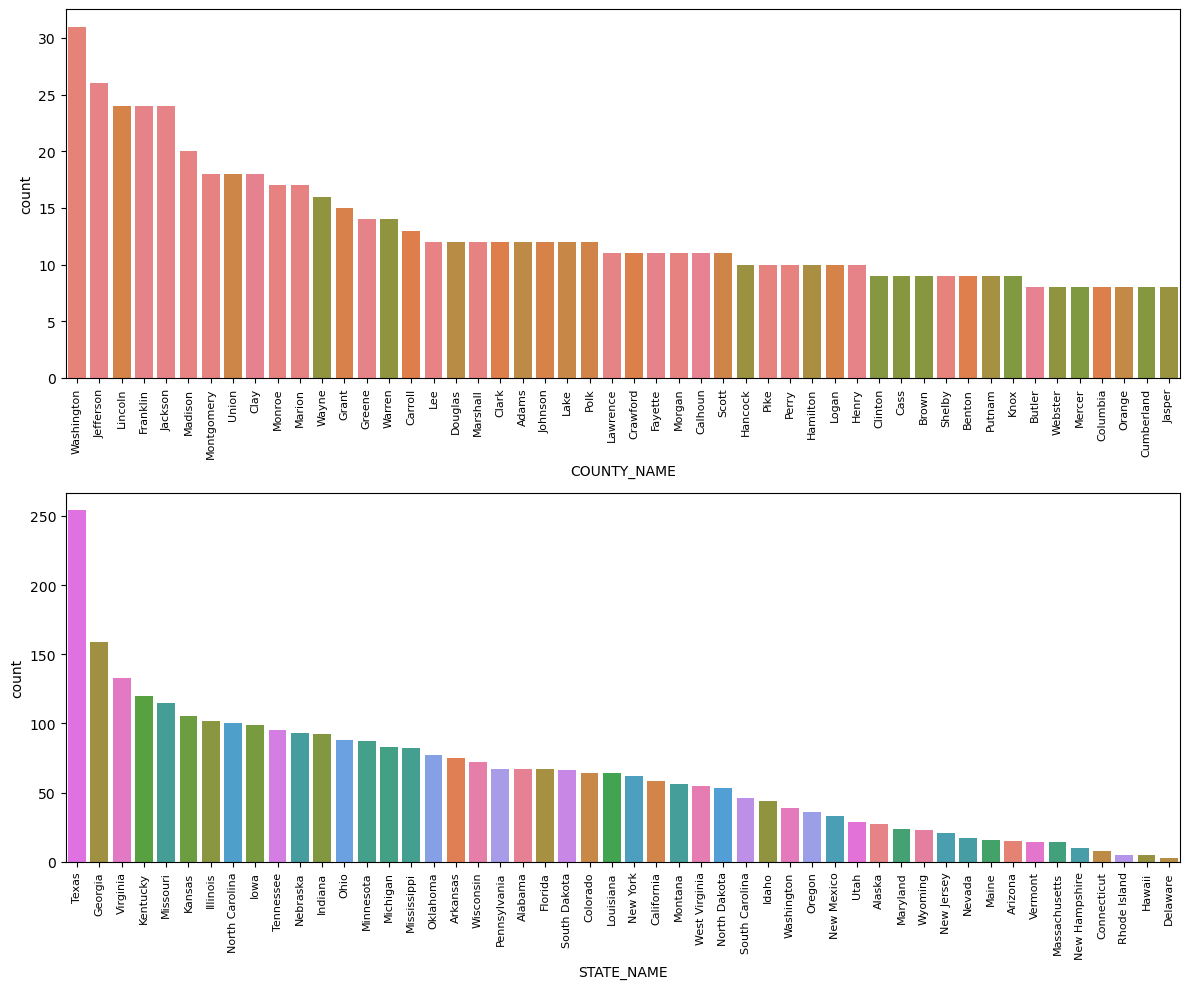

In [573]:
fig, ax = plt.subplots(2, 1, figsize= (12,10))

sns.countplot(ax=ax[0], data= df_cat, x="COUNTY_NAME", order=df_cat["COUNTY_NAME"].value_counts().index[:50], hue="COUNTY_NAME").tick_params(axis="x", rotation=90,labelsize=8)
sns.countplot(ax=ax[1], data= df_cat, x="STATE_NAME", order=df_cat["STATE_NAME"].value_counts().index[:50], hue="STATE_NAME").tick_params(axis="x", rotation=90,labelsize=8)

plt.tight_layout()
plt.show()

### ***Conclusion:***

- Texas destaca notablemente en el mapa de Estados Unidos por tener la mayor cantidad de divisiones territoriales (condados), lo que nos muestra una forma única de organizar su territorio comparado con el resto del país.
- Al analizar el sur y la región central del país, estados como Georgia y Kentucky llaman la atención por tener también un número elevado de condados, lo que sugiere que esta zona de Estados Unidos tiende a preferir una administración más dividida de su territorio.
- En contraste, cuando observamos los estados más pequeños o más urbanos, especialmente en la costa este y oeste del país, vemos que tienen muchos menos condados. Esto podría indicar que estas regiones prefieren una administración más centralizada de sus territorios.

## 3.3 Numerical Variable Analysis


In [574]:
df_num.head(3)

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,23.5,1,5,19689,57.5,55.6,59.1,11325,40.7,39.5,41.9,8013,11.0,10.1,11.8,2159,12.1,10.7,13.3,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6


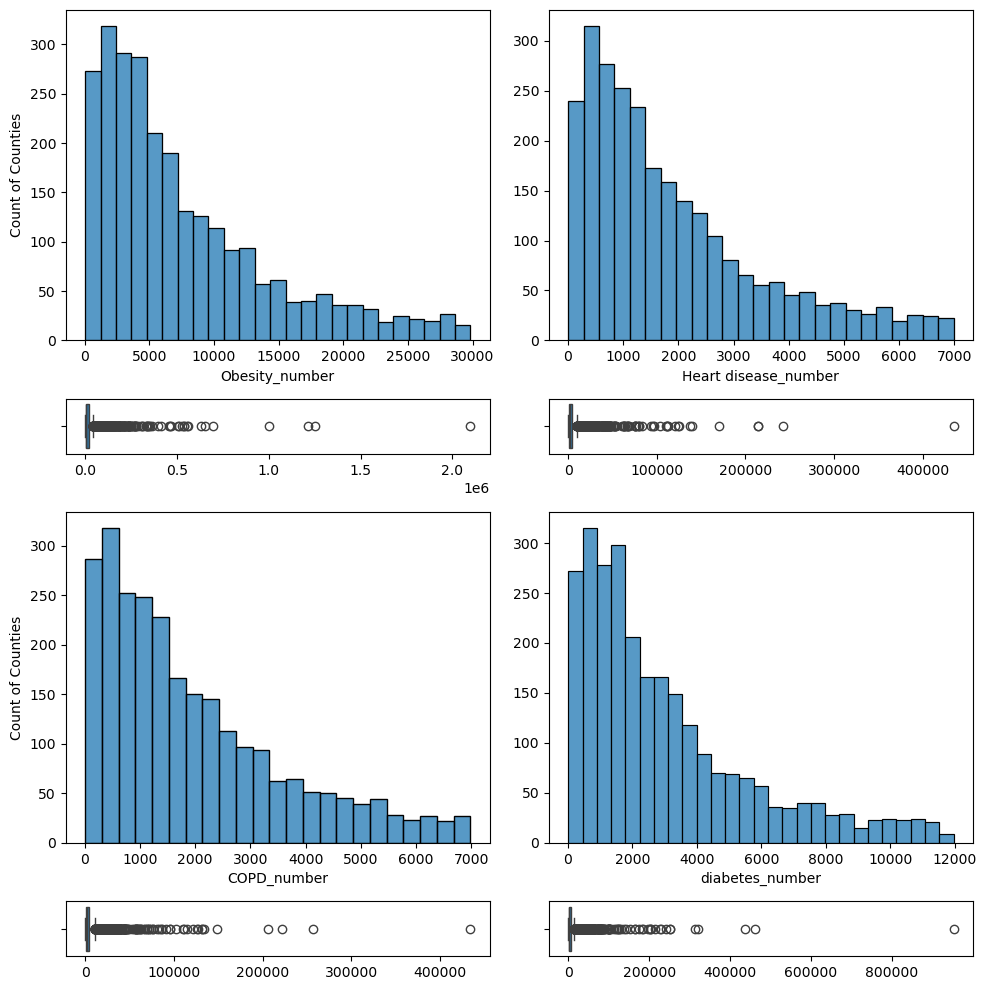

In [575]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Charts first row 
sns.histplot(ax = ax[0,0], data = df_num[df_num['Obesity_number']<30000], x='Obesity_number').set(ylabel='Count of Counties')
sns.boxplot(ax = ax[1,0], data = df_num, x='Obesity_number').set(xlabel = None)
sns.histplot(ax = ax[0,1], data = df_num[df_num['Heart disease_number']<7000], x='Heart disease_number').set(ylabel = None)
sns.boxplot(ax = ax[1,1], data = df_num, x='Heart disease_number').set(xlabel = None)

# Charts second row 
sns.histplot(ax = ax[2,0], data = df_num[df_num['COPD_number']<7000], x='COPD_number').set(ylabel='Count of Counties')
sns.boxplot(ax = ax[3,0], data = df_num, x='COPD_number').set(xlabel = None)
sns.histplot(ax = ax[2,1], data = df_num[df_num['diabetes_number']<12000], x='diabetes_number').set(ylabel = None)
sns.boxplot(ax = ax[3,1], data = df_num, x='diabetes_number').set(xlabel = None)

plt.tight_layout()
plt.show()

### ***Conclusion***

- *Distribución Desbalanceada:* Al examinar los datos de obesidad, enfermedades cardíacas, EPOC (enfermedad pulmonar) y diabetes, notamos que hay más condados con números bajos de casos y solo algunos con números muy altos. Es como si hubiera una "cola larga" hacia la derecha en la gráfica.
- *Casos Excepcionales:* En las gráficas de caja (boxplots) que tenemos debajo de cada histograma, se pueden ver puntos que sobresalen del patrón normal. Estos puntos representan condados que tienen muchos más casos de estas enfermedades que el resto. Esto podría deberse a varios factores como el tamaño de la población, las características de sus habitantes o riesgos particulares de salud en esas zonas.
- *Patrones Similares:* Es interesante notar que todas estas enfermedades muestran un patrón parecido en su distribución. Esto nos hace pensar que probablemente hay factores comunes que influyen en todas ellas, como podrían ser el estilo de vida de la zona, el nivel socioeconómico o qué tan fácil es acceder a servicios médicos en esos condados.

---

# 4. Multivariate Analysis

## 4.1 Encoding categorical variables

In [576]:
df_enc = df.copy()

In [577]:
for column in df_cat.columns:
    unique_values = list(df_cat[column].unique())
    globals()[f"{column}_enc"] = dict(zip(unique_values, range(len(unique_values))))

    json.dump(globals()[f"{column}_enc"], open(f'../data/interim/enc_{column}.json', 'w'))

In [578]:
for column in df_cat.columns:
    df_enc[column] = df_enc[column].map(json.load(open(f'../data/interim/enc_{column}.json')))

## 4.2 Numerical-Categorical Analysis

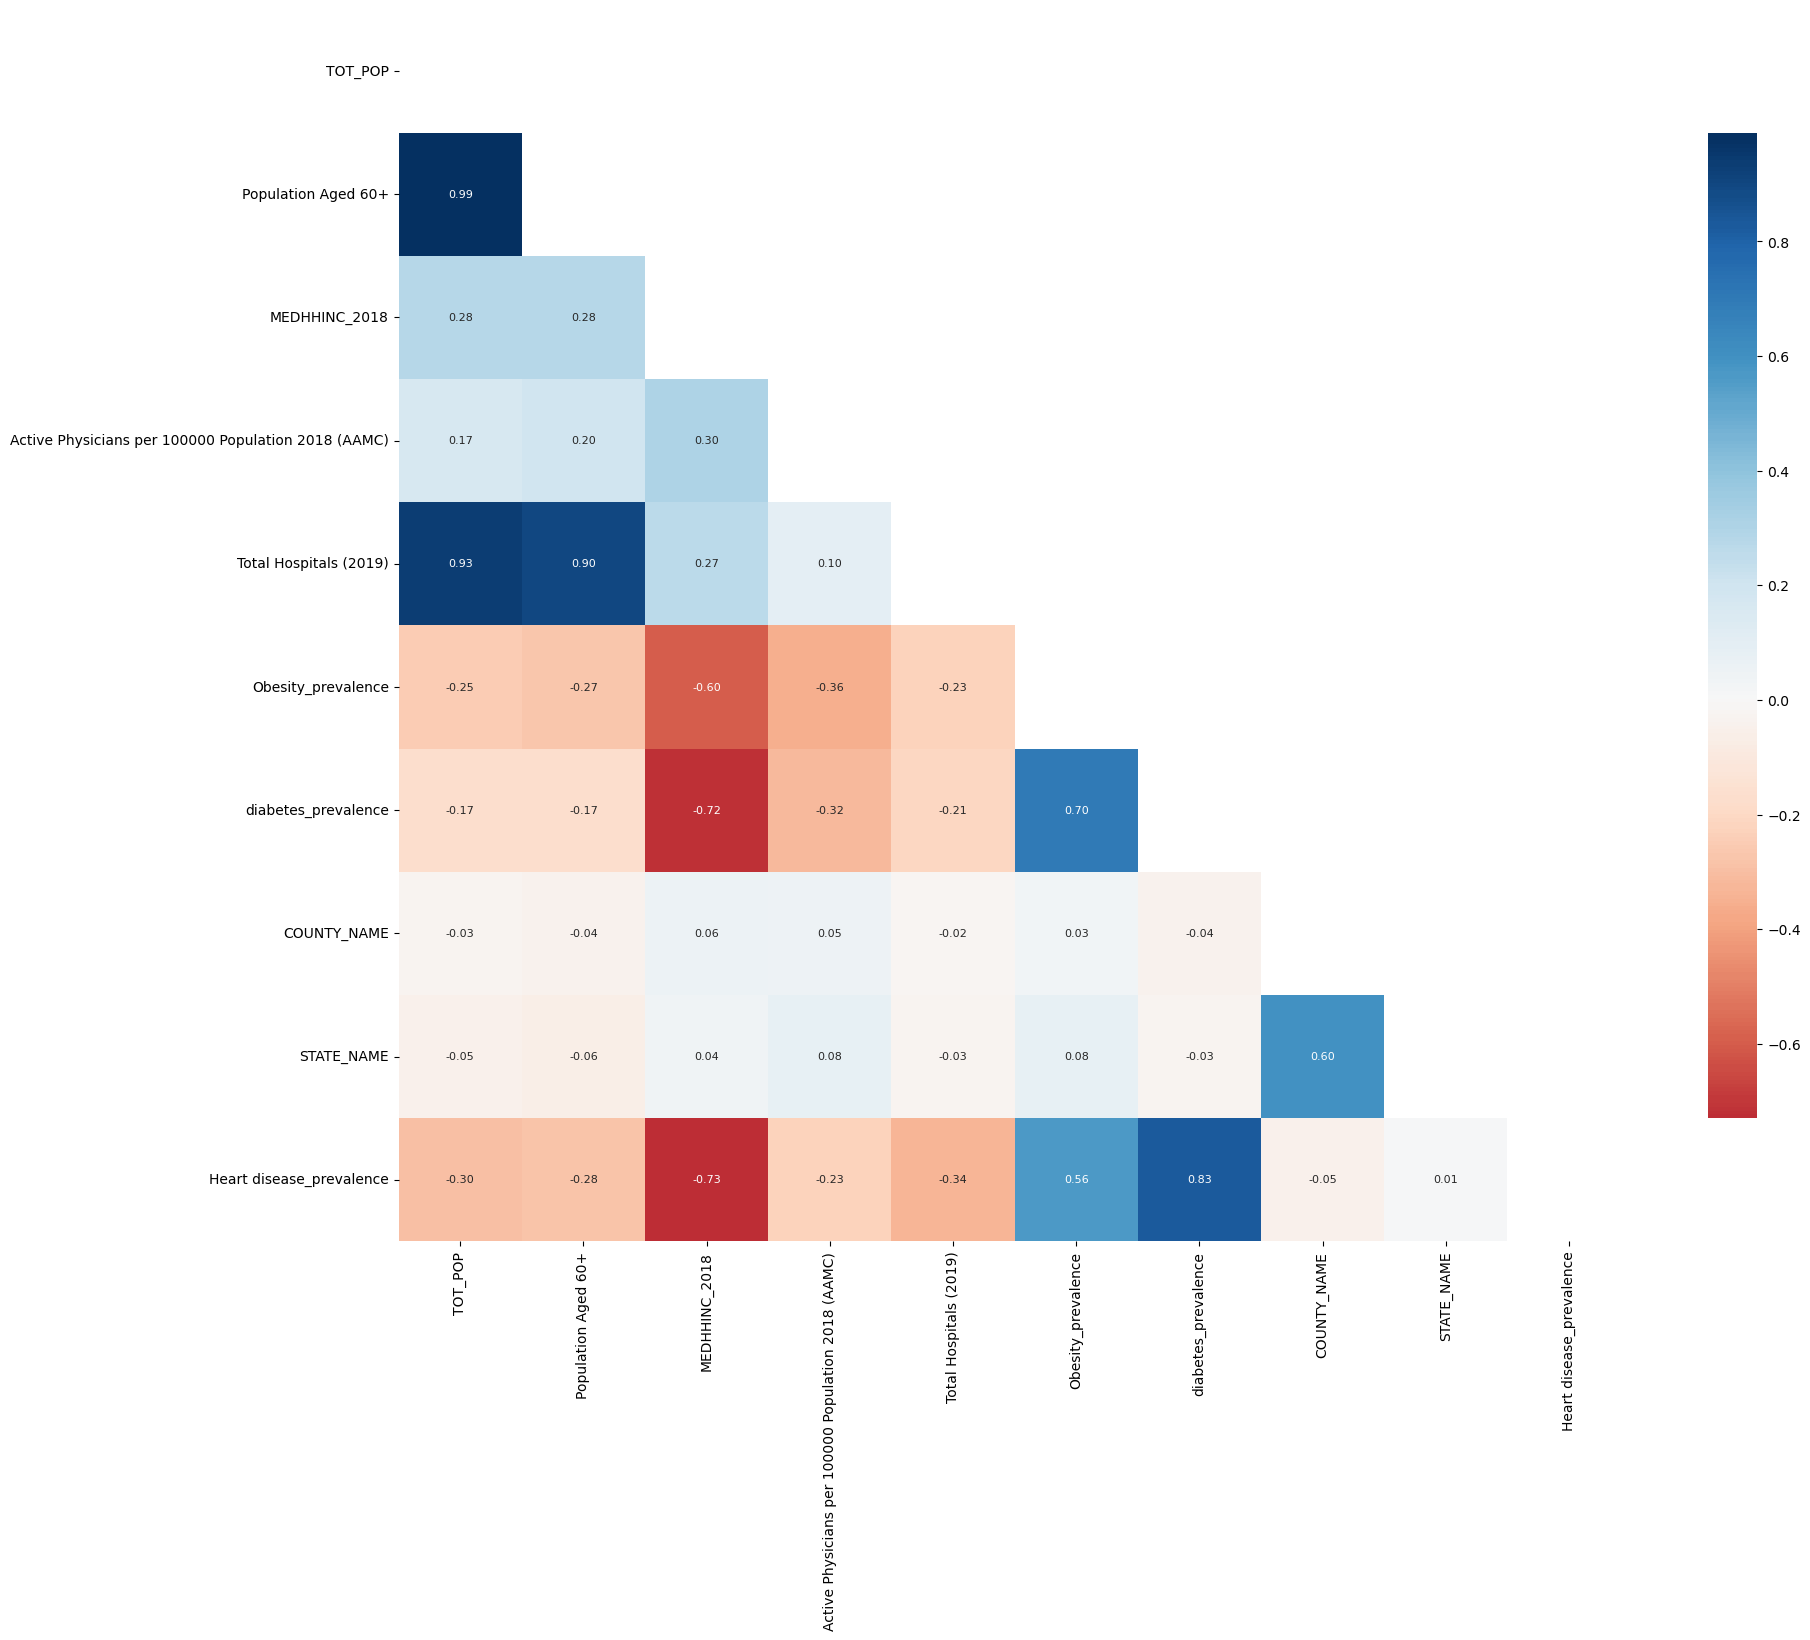

In [579]:
selected_variables = [
    'TOT_POP', 'Population Aged 60+', 'MEDHHINC_2018', 
    'Active Physicians per 100000 Population 2018 (AAMC)', 
    'Total Hospitals (2019)', 'Obesity_prevalence', 
    'diabetes_prevalence', 'COUNTY_NAME', 'STATE_NAME', 'Heart disease_prevalence'
]

plt.figure(figsize=(20,16))
sns.heatmap(df_enc[selected_variables].corr().round(2), 
            annot=True,
            mask=np.triu(df_enc[selected_variables].corr()),
            cmap='RdBu',
            center=0,
            square=True,
            fmt='.2f',
            annot_kws={'size': 8},  
            cbar_kws={'shrink': .8}
            )
plt.show()

---

# 5. Feture Engineering

## 5.2 Outlier Analysis

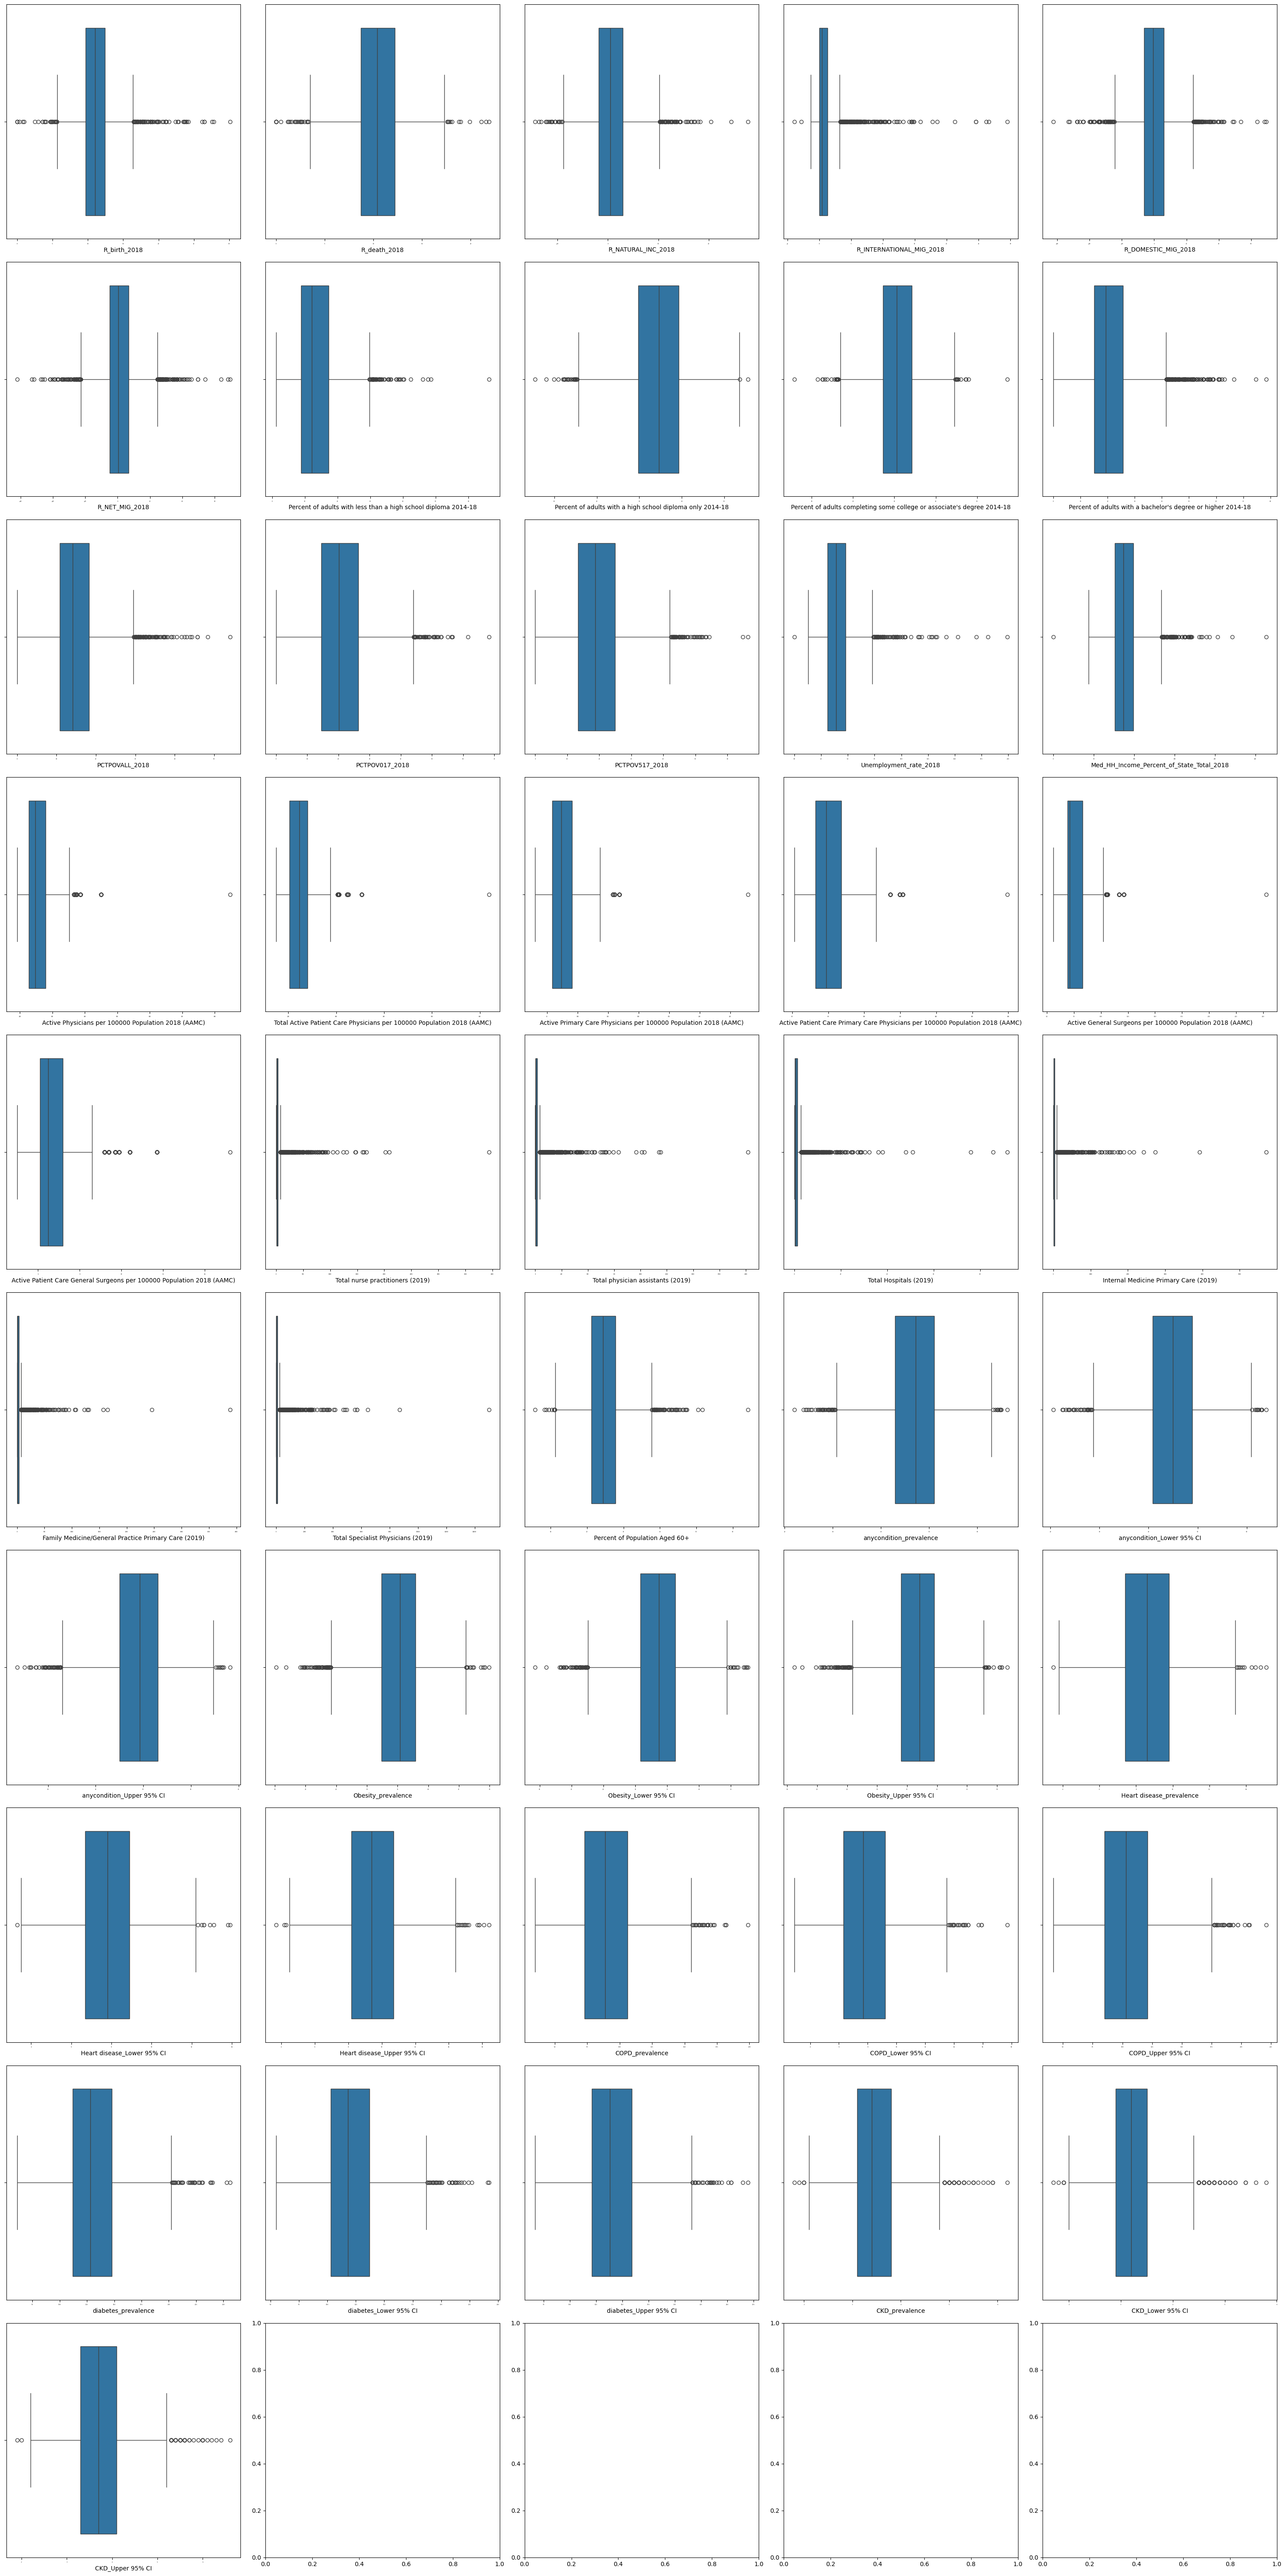

In [580]:
continuos_f = list(df_enc.select_dtypes('float64'))

fig, ax = plt.subplots(10,5, figsize=(30, 60))

row, col = 0, 0
for each in continuos_f:
    sns.boxplot(ax = ax[row,col], data = df_enc, x=each).tick_params(labelsize=2)
    col += 1
    if col == 5: 
        row += 1 
        col = 0

plt.tight_layout()
plt.show()

In [581]:
df_enc_no = df_enc.copy()

In [582]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [583]:
f_outliers_with_neg = []
f_outliers_no_neg = []

for each in continuos_f:
    if df_enc[each].min() < 0:
        f_outliers_with_neg.append(each)
    f_outliers_no_neg.append(each)

for feature in f_outliers_with_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature)

for feature in f_outliers_no_neg:
    try:
        df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=False)
    except:
        continue

---

# 6. Preprocessing

## 6.1 Split train and text

In [584]:
def split(target, df, test_size=0.2, random_state=42):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [585]:
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Heart disease_number', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Heart disease_number', df_enc_no)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [586]:
X_test_with_outliers.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2893,51159,9038,812,903,1107,1251,1213,1266,1114,795,577,6036,2695,44,57,4,202,9038,113,1666,10.4,11.1,-0.8,0.0,13.2,13.2,1179,2600,1869,1049,17.6,38.8,27.9,15.7,1169,15.9,22.5,20.8,49399,44241,54557,4040,3916,124,3.1,49399,68.0,263.2,231.8,90.3,81.7,7.3,6.3,4.751545,2.230404,0.101864,4.507495,3.956791,12.469888,0,8873,2400,27.0,1722,46,51,159,7485,46.5,44.8,48.2,3483,37.0,35.7,38.3,2769,9.3,8.6,10.1,9.8,8.6,11.0,734,14.8,14.0,15.6,1107,3.9,3.7,4.2,293,6
2968,53035,269805,30843,29948,41468,36139,29901,34984,34993,21751,9778,222752,8384,4669,14730,2685,16585,269805,3255,9300,11.6,8.8,2.8,0.4,8.9,9.3,10152,41056,71771,58452,5.6,22.6,39.6,32.2,23613,9.1,11.5,10.5,76530,74061,78999,122885,117172,5713,4.6,76530,103.4,278.8,246.3,100.6,91.7,6.9,6.1,108.737030,68.314209,3.293977,134.193740,158.146678,398.034100,20,258903,59433,23.0,1764,47,53,35,214553,39.9,38.0,41.8,85526,29.7,28.4,31.0,63722,6.5,5.9,7.1,6.0,5.1,6.9,12803,10.1,9.4,11.0,21777,2.8,2.6,3.0,5976,3
1064,21147,17408,2076,2129,2244,2419,2423,2338,1912,1341,526,15940,988,130,66,10,274,17408,-15,1936,11.9,9.8,2.1,0.1,-3.0,-2.9,3146,5285,3084,851,25.4,42.7,24.9,6.9,5274,33.7,39.4,38.5,30029,27041,33017,4654,4360,294,6.3,30029,59.8,230.9,214.6,77.3,72.9,8.3,7.6,11.430277,3.841259,0.409059,7.694205,7.402020,25.151284,0,17748,3649,20.6,727,17,21,147,13625,64.1,62.2,65.9,8737,43.5,41.7,45.2,5927,13.0,12.0,14.1,16.8,15.0,18.9,2289,19.1,18.0,20.2,2604,4.4,4.0,4.7,594,6
1231,26005,117327,15179,15892,13545,14075,14215,16816,15057,8452,4096,111316,1776,870,1053,43,2269,117327,894,955,11.7,7.9,3.8,0.4,3.5,3.9,7278,29465,23472,17640,9.3,37.8,30.1,22.7,12429,10.7,13.6,12.5,62247,58055,66439,62239,60206,2033,3.3,62247,109.9,287.0,249.7,97.8,87.6,7.9,6.7,51.879727,44.402943

## 6.2 Normalization

In [587]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/processed/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [588]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

## 6.3 Min-Max Scaling

In [589]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/processed/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [590]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

## 6.4 KSelection

In [591]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/processed/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel  

In [592]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 70, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 70, 'without_outliers')

### 6.4.1 Filtering the features

In [593]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

### 6.4.2 Saving the CSV files

In [594]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

---

# 7. Machine Learning - Linear Regression

In [595]:
train, test = [], []

for name, df in dfs_train.items():
    train.append(df)
for name, df in dfs_test.items():
    test.append(df)

In [596]:
results = []

for index in range(len(train)):
    model = LinearRegression()
    train_df = train[index]
    model.fit(train_df, y_train)
    y_test_pred = model.predict(test[index])

    results.append(
        {
            'index': index,
            'df_train': list(dfs_train.keys())[index],
            'MAE': mean_absolute_error(y_test, y_test_pred).round(2),
            'RMSE': round(root_mean_squared_error(y_test, y_test_pred),2),
            "R2_score": round(r2_score(y_test, y_test_pred),5)            
        }
    )

results = sorted(results, key=lambda x: x['RMSE'])
best_ind = results[0]['index']
best_df_train = results[0]['df_train']
results[0]

{'index': 3,
 'df_train': 'X_train_without_outliers_norm_sel',
 'MAE': 180.18,
 'RMSE': 367.51,
 'R2_score': 0.99846}

In [597]:
print(f'Our best dataframe for our model is {best_df_train}, with a MAE of {results[0]["MAE"]}, a RMSE of {results[0]["RMSE"]} and a R2_score of {results[0]["R2_score"]}')


Our best dataframe for our model is X_train_without_outliers_norm_sel, with a MAE of 180.18, a RMSE of 367.51 and a R2_score of 0.99846


## 7.1 Optimization

In [598]:
models = [Lasso, Ridge, ElasticNet]

res2 = []
alpha = 0.1
best_model_instance = None  

for m in models: 
    model = m(alpha=alpha)
    model.fit(X_train_without_outliers_norm_sel, y_train)
    y_test_pred = model.predict(X_test_without_outliers_norm_sel)
    r2_score(y_test, y_test_pred)
    
    current_rmse = round(root_mean_squared_error(y_test, y_test_pred),2)
    
    res2.append(
        {
            'Model': m,
            'MAE': mean_absolute_error(y_test, y_test_pred).round(2),
            'RMSE': current_rmse,
            "R2_score": round(r2_score(y_test, y_test_pred),5)            
        })
    
    if best_model_instance is None or current_rmse < res2[0]['RMSE']:
        best_model_instance = model 

res2 = sorted(res2, key=lambda x: x['RMSE'])
best_model = str(res2[0]["Model"])[-str(res2[0]["Model"])[::-1].find("."):-str(res2[0]["Model"])[::-1].find("'")-1]
mae = res2[0]["MAE"]
rmse = res2[0]["RMSE"]
r2score = res2[0]["R2_score"]

print(f'Our best model is {best_model}, with a MAE of {mae}, a RMSE of {rmse} and a R2_score of {r2score}')

Our best model is Ridge, with a MAE of 169.19, a RMSE of 350.83 and a R2_score of 0.99859


# 8. Saving the model

In [600]:
with open(f'../models/best_model_{best_model}.pkl', 'wb') as f:
    dump(best_model_instance, f)